# Proyek Analisis Data: Nama dataset
- Nama: Salsabila Zahirah / Ira Salsabila
- Email: irasalsabila@gmail.com
- Id Dicoding: [irasalsabila](https://www.dicoding.com/users/irasalsabila/)

## Menentukan Pertanyaan Bisnis

**Relevant:**
- Apa hubungan suhu (temp) dengan jumlah pengguna biasa (casual) dan jumlah pengguna yang sudah terigistrasi (registered) pada setiap musim?
- Apa pengaruh humidity, temperature, dan windspeed terhadap jumlah sewa sepeda (cnt) setiap hari Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, dan Minggu?

## Menyiapkan semua library yang dibutuhkan

In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

import warnings

## Data Wrangling

### Gathering Data

In [5]:
df_day = pd.read_csv("dataset/day.csv")
display("this is df_day: ", df_day)

df_hour = pd.read_csv("dataset/hour.csv")
display("this is df_hour: ", df_hour)

'this is df_day: '

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


'this is df_hour: '

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [6]:
# Printing datatype information of the df_day DataFrame
print('Dataframe day - Datatype Information:')
print(df_day.info())

# Checking for duplicated entries in df_day
print('Dataframe day - Duplicated Entries:', df_day.duplicated().sum())

# Displaying descriptive statistics of df_day
display(df_day.describe())

Dataframe day - Datatype Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Dataframe day - Duplicated Entries: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# Printing datatype information of the df_hour DataFrame
print('Dataframe day - Datatype Information:')
print(df_hour.info())

# Checking for duplicated entries in df_hour
print('Dataframe day - Duplicated Entries:', df_hour.duplicated().sum())

# Displaying descriptive statistics of df_hour
display(df_hour.describe())


Dataframe day - Datatype Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
Datafr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [8]:
## Converting "dteday" column to datetime ##
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Checking the data type after conversion for df_day and df_hour
print('Data type of df_day["dteday"]: ', df_day["dteday"].dtypes)
print('Data type of df_hour["dteday"]: ', df_hour["dteday"].dtypes)

Data type of df_day["dteday"]:  datetime64[ns]
Data type of df_hour["dteday"]:  datetime64[ns]


## Exploratory Data Analysis (EDA)

> Correlation of all variables

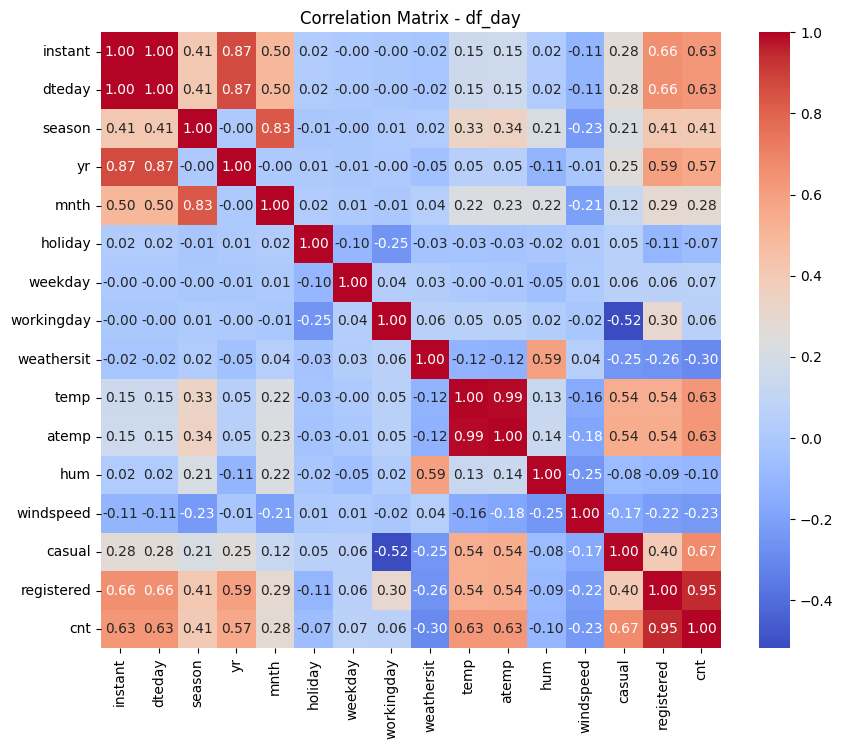

In [9]:
# Generating the correlation matrix for df_day
correlation_matrix = df_day.corr()

# Visualizing the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - df_day')
plt.show()

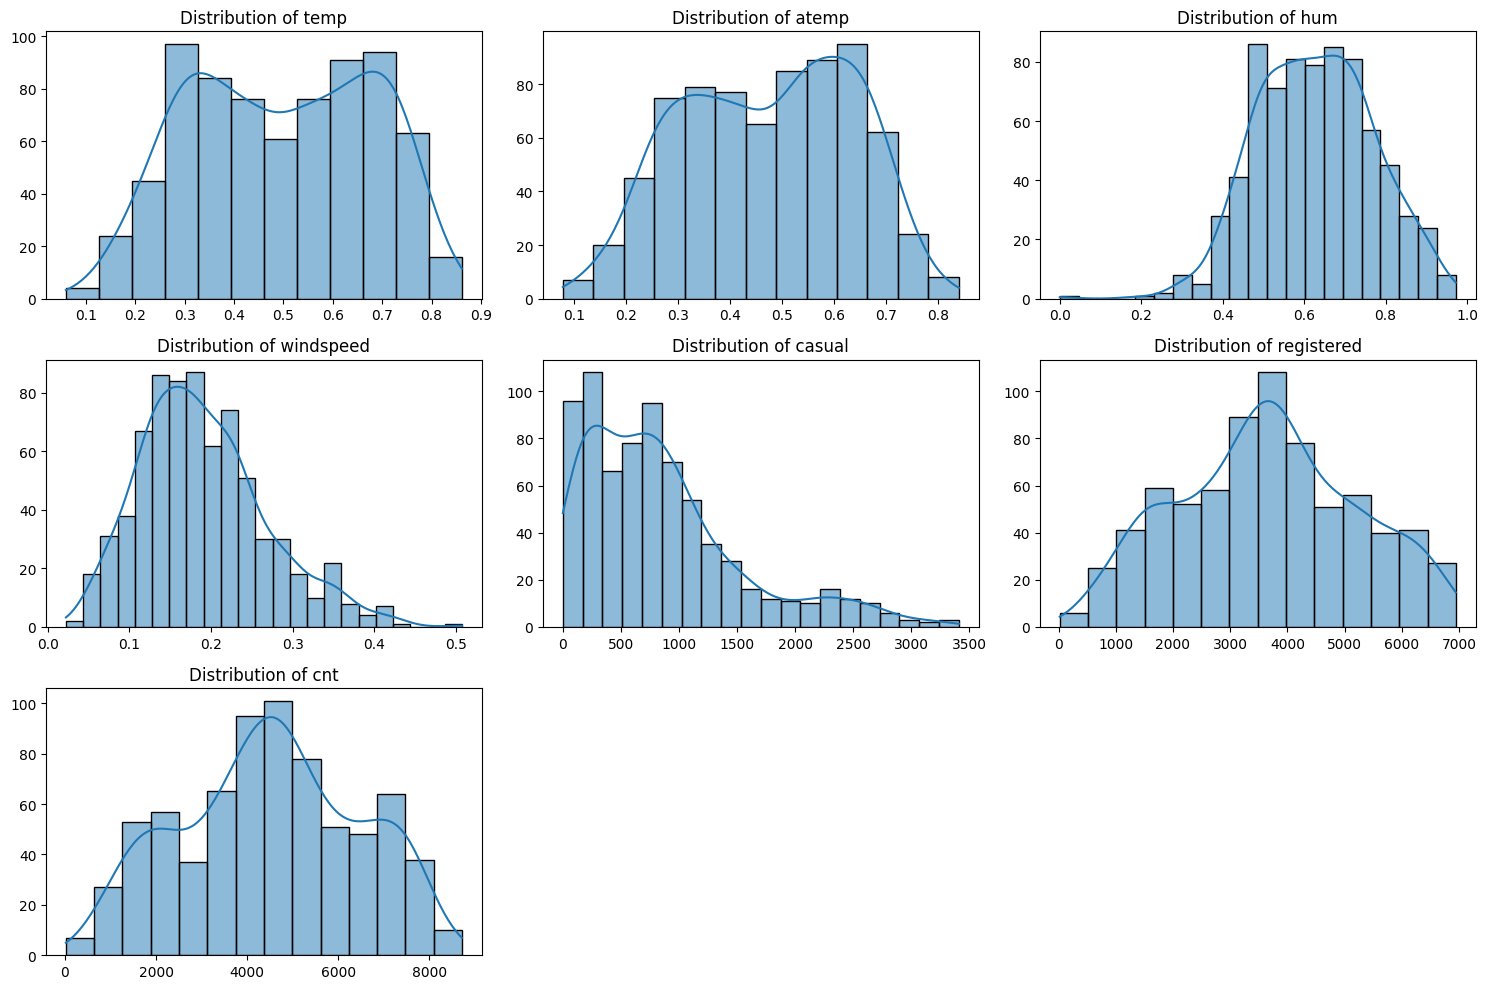

In [10]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Define the number of columns and rows in the grid
num_cols = 3  # Number of columns for the grid
num_rows = (len(numeric_cols) - 1) // num_cols + 1  # Number of rows based on columns

# Create subplots for the histograms in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate through all subplots
axes = axes.flatten()

# Plot each numeric column as a histogram
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(df_day[col], ax=ax, kde=True, bins='auto')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide extra subplots if there are any
for i in range(len(numeric_cols), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


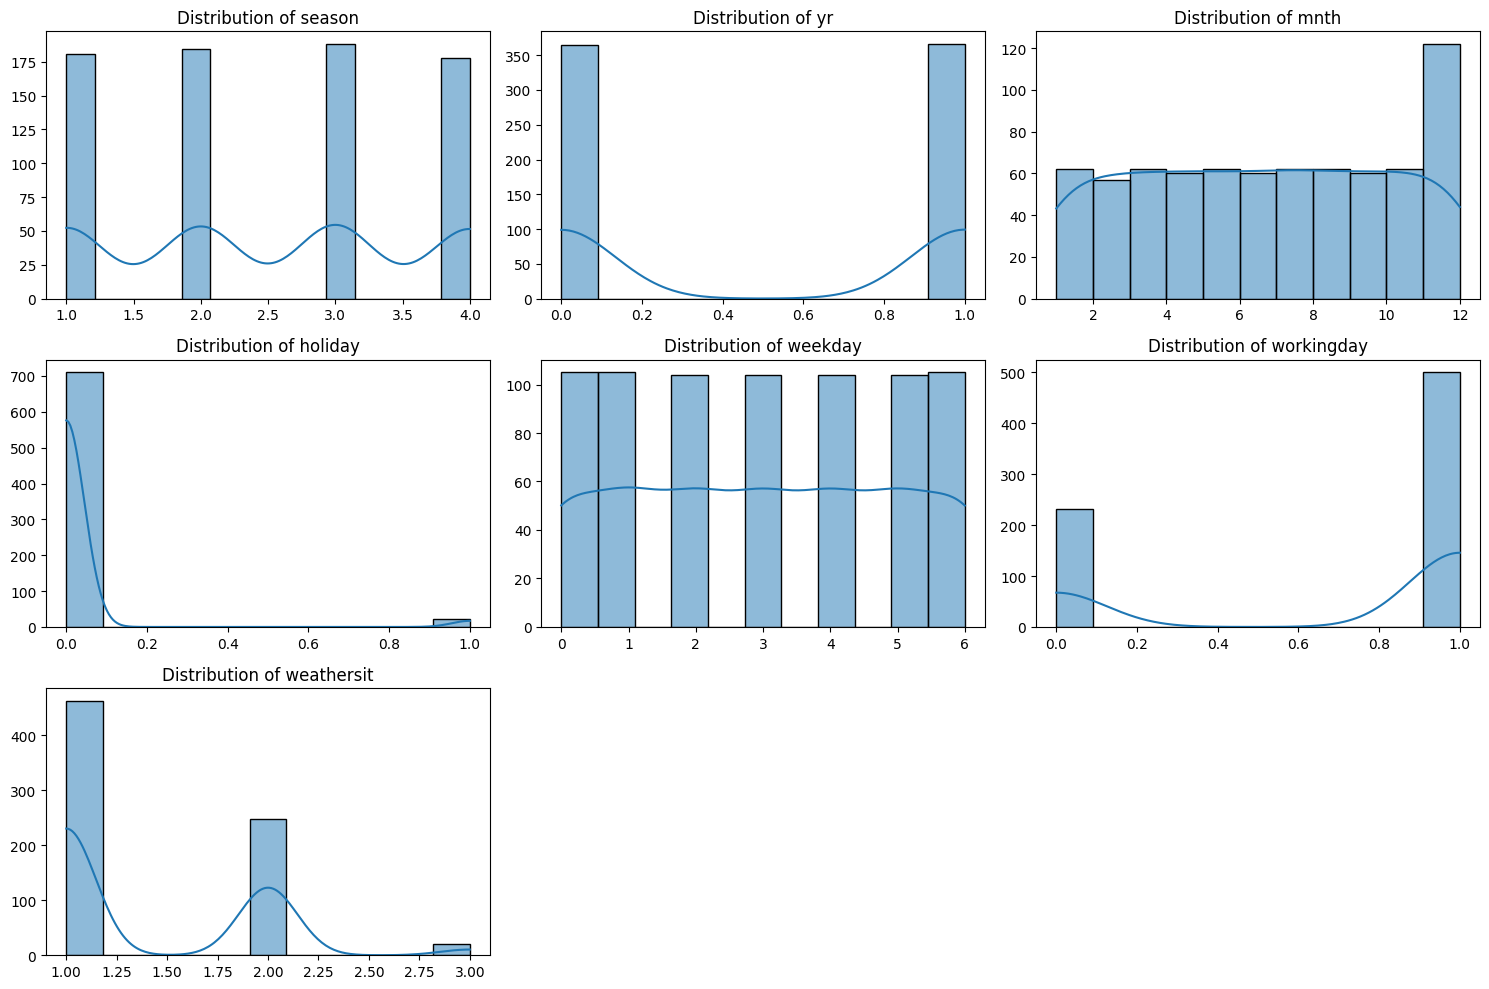

In [13]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Define the number of columns and rows in the grid
num_cols = 3  # Number of columns for the grid
num_rows = (len(categorical_cols) - 1) // num_cols + 1  # Number of rows based on columns

# Create subplots for the histograms in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate through all subplots
axes = axes.flatten()

# Plot each numeric column as a histogram
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.histplot(df_day[col], ax=ax, kde=True, bins='auto')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide extra subplots if there are any
for i in range(len(categorical_cols), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

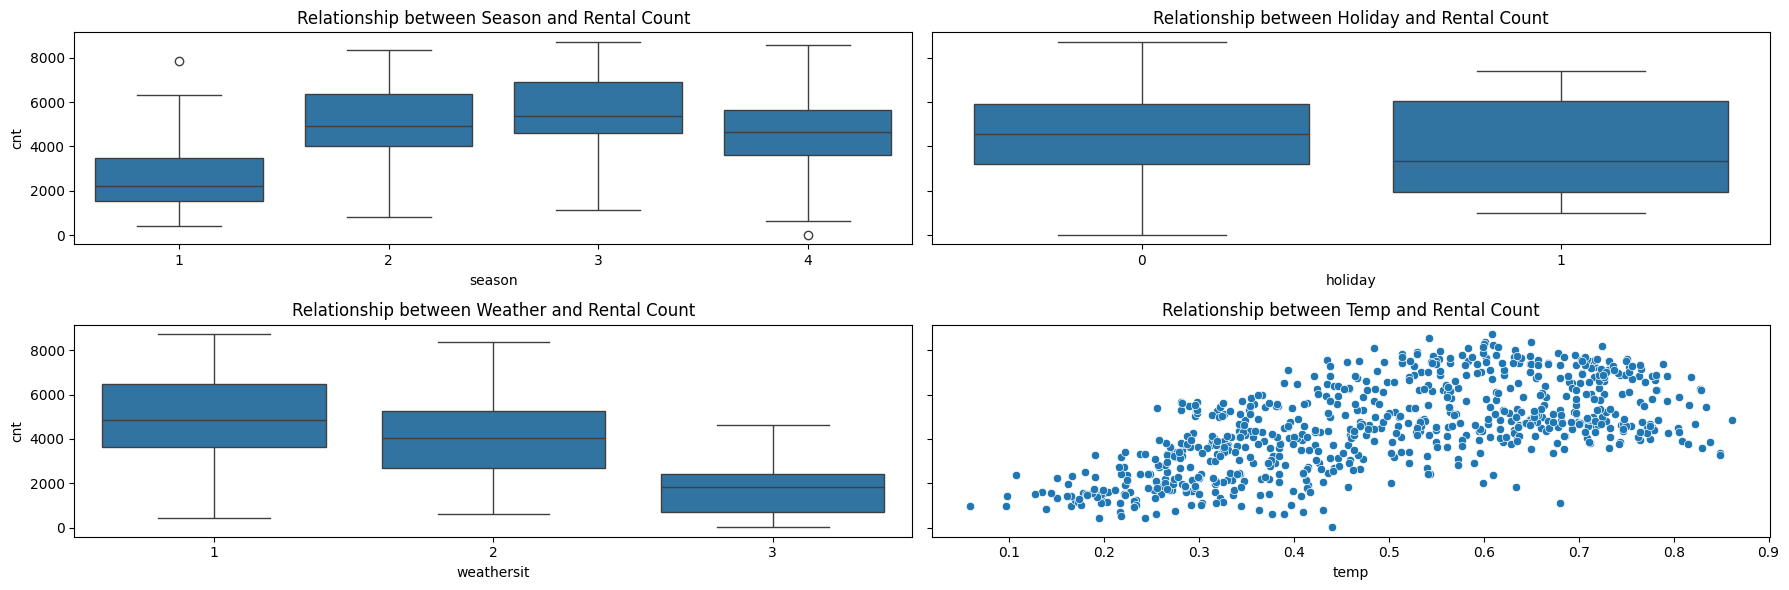

In [14]:
# Define the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 6), sharey=True)

# Visualizing the relationship between seasons and rental count using a box plot
sns.boxplot(x='season', y='cnt', data=df_day, ax=axes[0, 0])
axes[0, 0].set_title('Relationship between Season and Rental Count')

# Visualizing the relationship between holidays and rental count using a box plot
sns.boxplot(x='holiday', y='cnt', data=df_day, ax=axes[0, 1])
axes[0, 1].set_title('Relationship between Holiday and Rental Count')

# Visualizing the relationship between weather and rental count using a box plot
sns.boxplot(x='weathersit', y='cnt', data=df_day, ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Weather and Rental Count')

# Visualizing the relationship between temp and rental count using a scatter plot
sns.scatterplot(x='temp', y='cnt', data=df_day, ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Temp and Rental Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

> Apa hubungan suhu (temp) dengan jumlah pengguna biasa (casual) dan jumlah pengguna yang sudah terigistrasi (registered) pada setiap musim (season)?

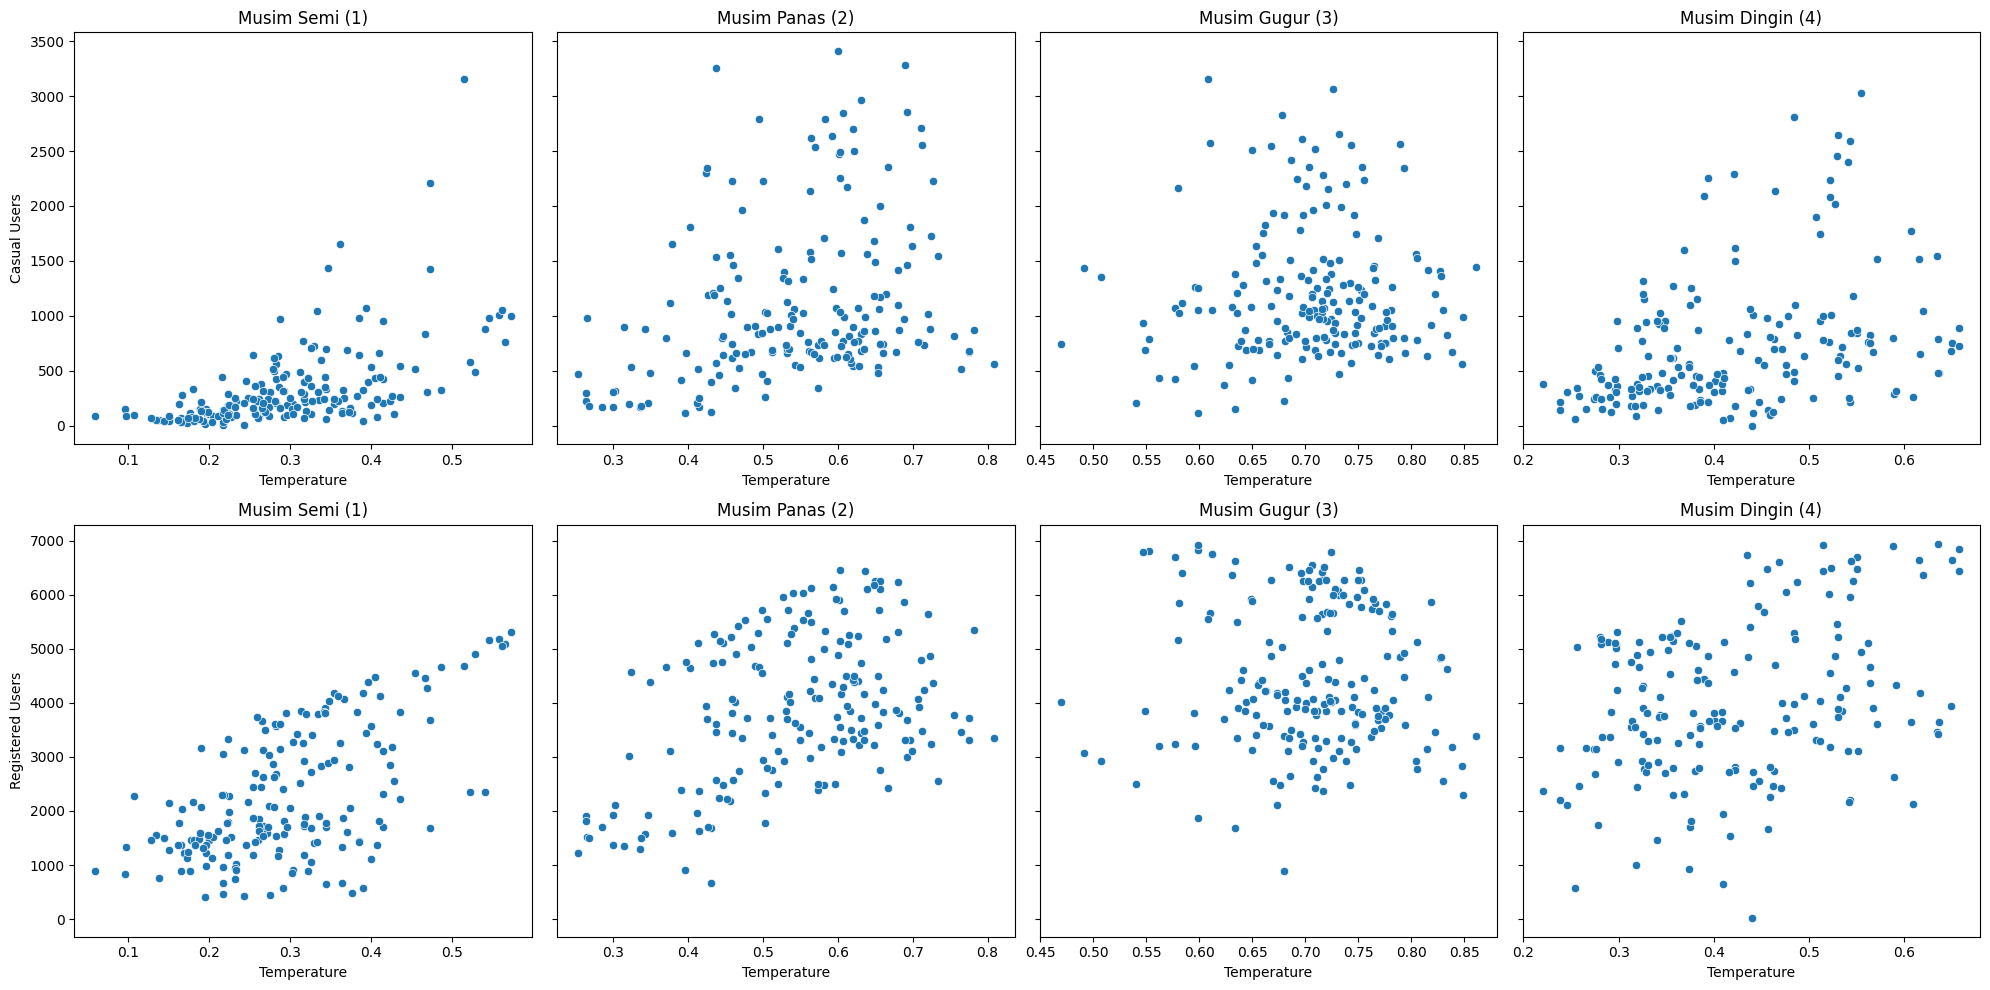

In [15]:
# Filter data for each season
season_data = {season: df_day[df_day['season'] == season] for season in range(1, 5)}

# Define season names in Indonesian
season_names = {
    1: "Musim Semi (1)",
    2: "Musim Panas (2)",
    3: "Musim Gugur (3)",
    4: "Musim Dingin (4)"
}

# Create subplots for casual and registered users
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey='row')

# Plot scatter plots for each season for casual and registered users
for i, (season, data) in enumerate(season_data.items()):
    # Plot for casual users
    sns.scatterplot(x='temp', y='casual', data=data, ax=axes[0, i])
    axes[0, i].set_title(season_names[season])
    axes[0, i].set_xlabel('Temperature')
    axes[0, i].set_ylabel('Casual Users')

    # Plot for registered users
    sns.scatterplot(x='temp', y='registered', data=data, ax=axes[1, i])
    axes[1, i].set_title(season_names[season])
    axes[1, i].set_xlabel('Temperature')
    axes[1, i].set_ylabel('Registered Users')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

> insight

1. **Musim Semi (1)** dan **Musim Dingin (4)** menunjukkan peningkatan yang jelas dalam jumlah pengguna biasa (`casual`) dan pengguna terdaftar (`registered`) seiring dengan peningkatan suhu. Ini menunjukkan bahwa lebih banyak orang cenderung menggunakan sepeda saat suhu lebih tinggi di musim-musim ini.

2. **Musim Panas (2)** menunjukkan distribusi yang luas untuk pengguna biasa (`casual`), tetapi hubungan yang lebih kuat dan positif antara suhu dan pengguna terdaftar (`registered`). Ini menunjukkan bahwa pengguna terdaftar lebih konsisten menggunakan sepeda dalam berbagai suhu selama musim panas.

3. **Musim Gugur (3)** menunjukkan sedikit penurunan dalam jumlah pengguna biasa (`casual`) pada suhu yang lebih tinggi, sedangkan pengguna terdaftar (`registered`) menunjukkan distribusi yang lebih konsisten tetapi dengan beberapa penurunan pada suhu tertentu. Ini menunjukkan bahwa faktor lain mungkin mempengaruhi penggunaan sepeda di musim gugur.

> Apa pengaruh humidity, temperature, dan windspeed terhadap jumlah sewa sepeda (cnt) setiap hari Senin, Selasa, Rabu, Kamis, Jumat, Sabtu, dan Minggu?

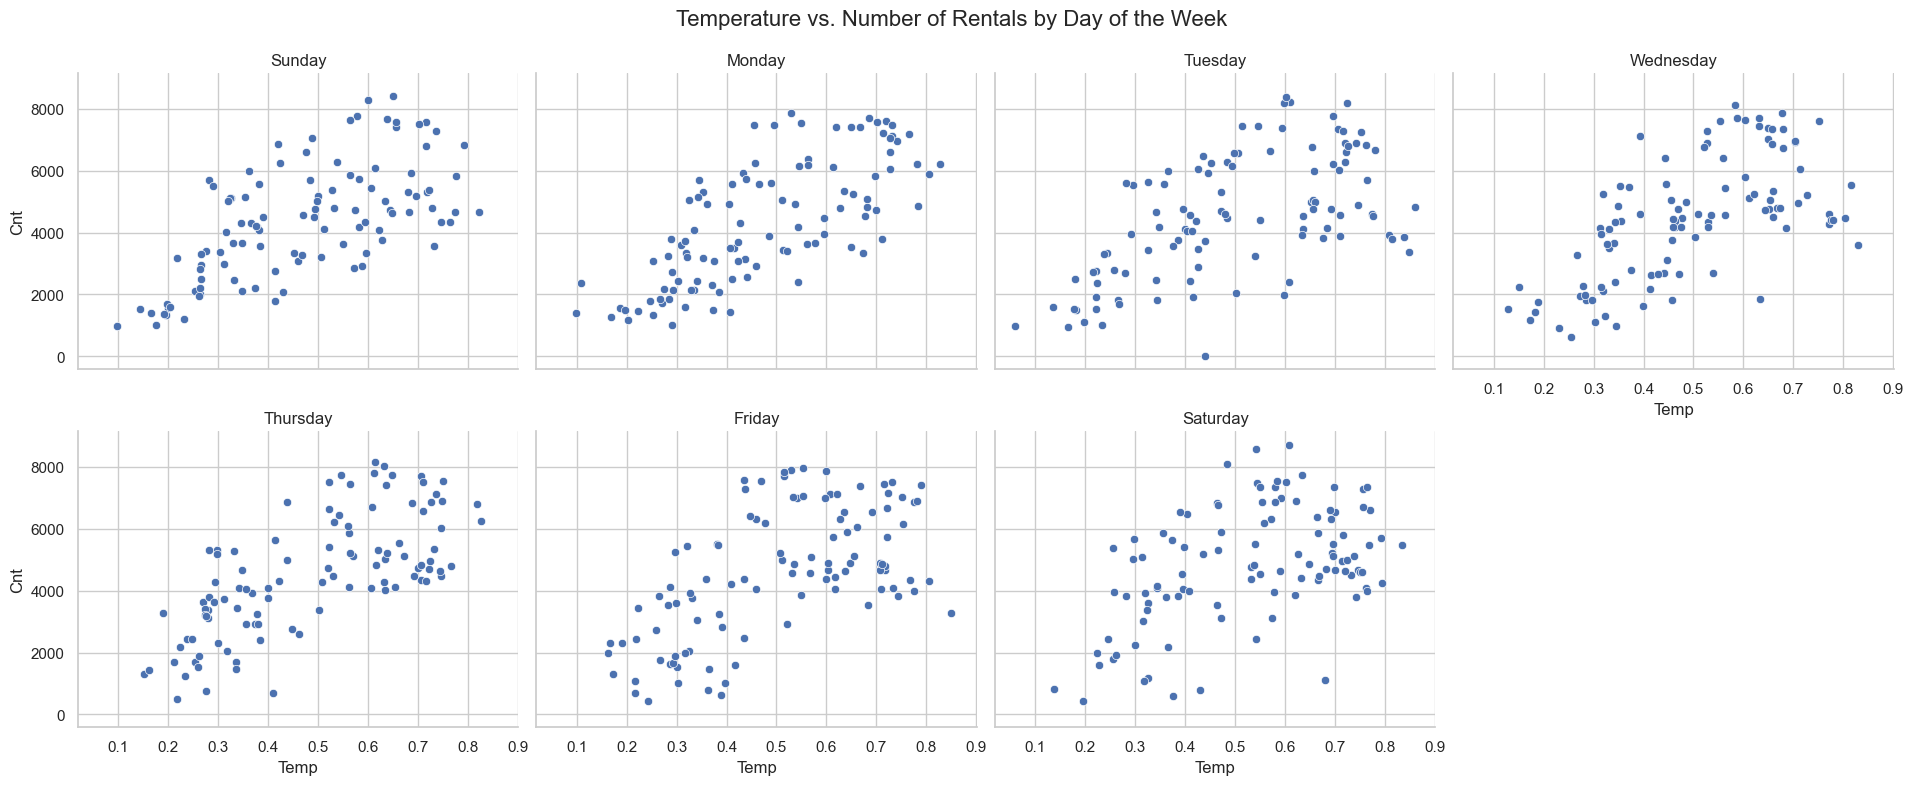

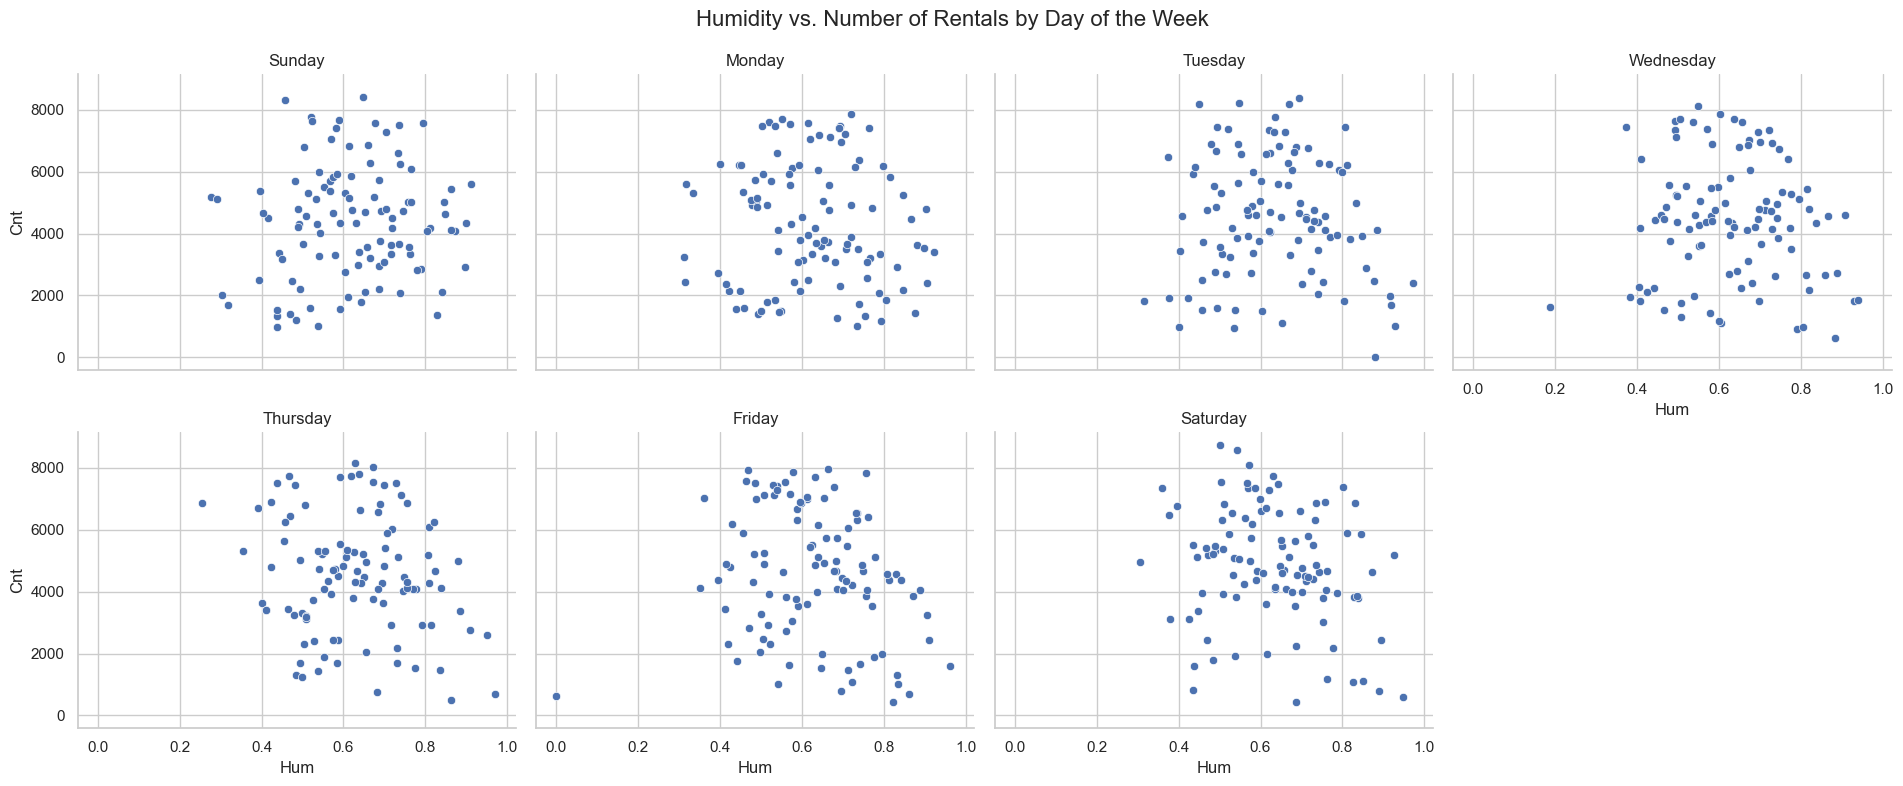

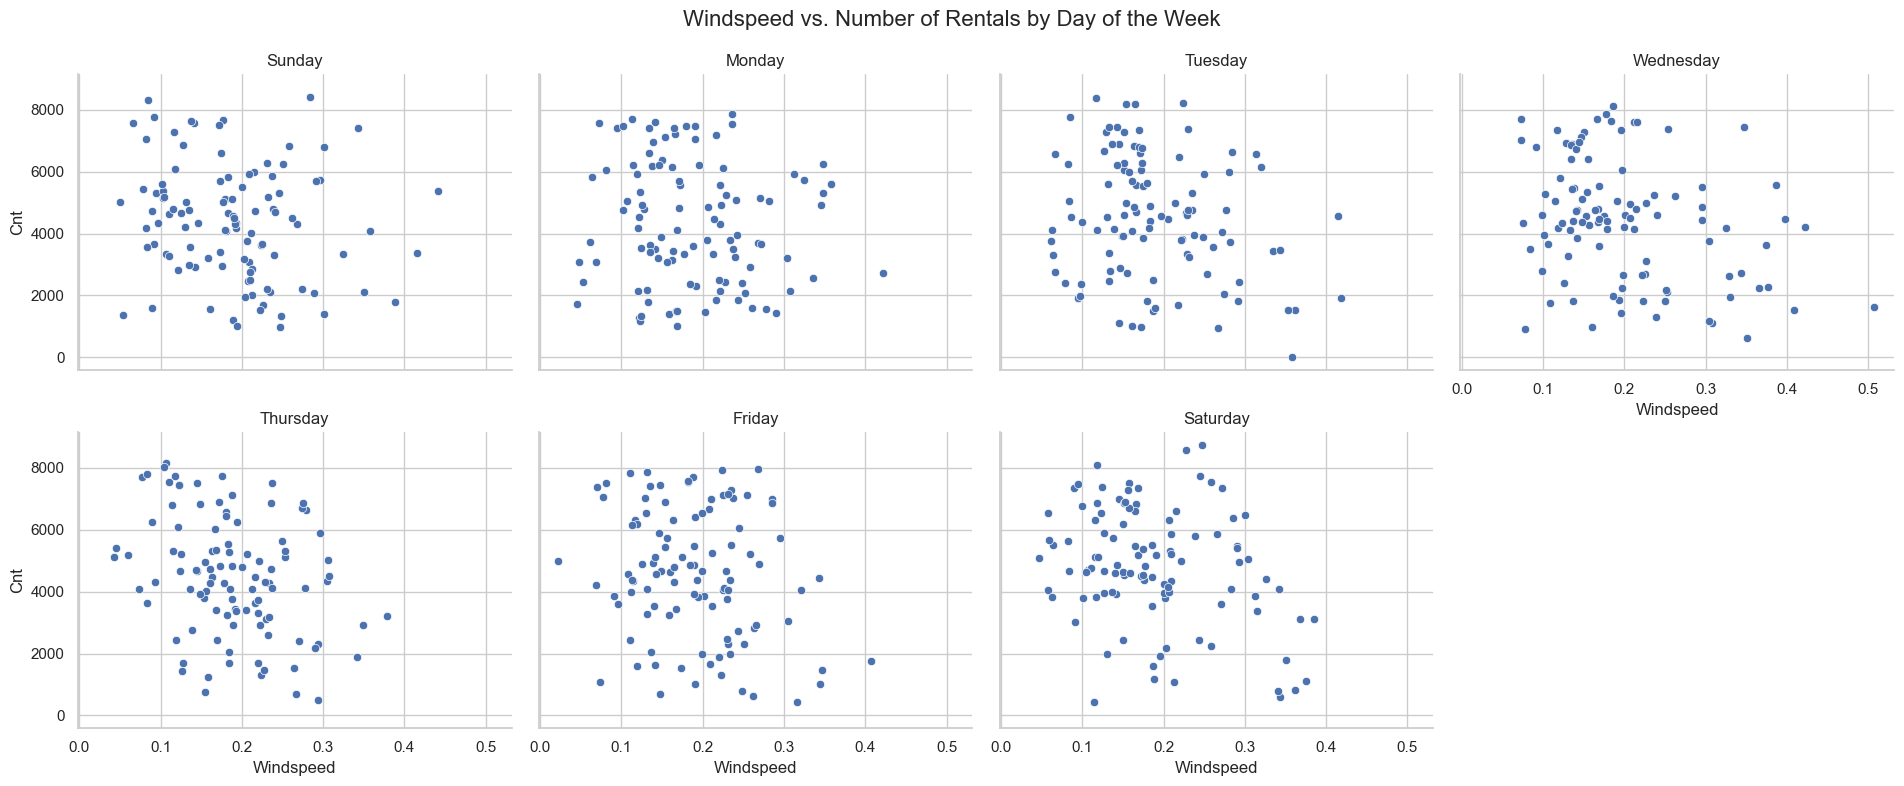

In [31]:
q_2 = df_day.groupby(["weekday", "hum", "temp", "windspeed"])["cnt"].sum().reset_index()
q_2["weekday"] = df_day["weekday"].apply(lambda x: calendar.day_name[x])

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a FacetGrid to plot scatter plots for each day of the week
def scatter_plot_by_day(df, x_var, y_var, title):
    g = sns.FacetGrid(df, col="weekday", col_wrap=4, height=4, aspect=1.2)
    g.map(sns.scatterplot, x_var, y_var)
    
    g.set_titles("{col_name}")
    g.set_axis_labels(x_var, y_var)
    g.set_xlabels(f'{x_var.capitalize()}')
    g.set_ylabels(f'{y_var.capitalize()}')
    
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize=16)
    
    plt.show()

# Plot 1: Temperature vs. Number of Rentals by Day of the Week
scatter_plot_by_day(q_2, 'temp', 'cnt', 'Temperature vs. Number of Rentals by Day of the Week')

# Plot 2: Humidity vs. Number of Rentals by Day of the Week
scatter_plot_by_day(q_2, 'hum', 'cnt', 'Humidity vs. Number of Rentals by Day of the Week')

# Plot 3: Windspeed vs. Number of Rentals by Day of the Week
scatter_plot_by_day(q_2, 'windspeed', 'cnt', 'Windspeed vs. Number of Rentals by Day of the Week')

> insight
- Apabila dilihat berdasarkan Temperature, Humidity, dan Windspeed, dari Senin hingga Minggu, pada penyewa sepeda konsisten:
    - Untuk menyewa sepeda ketika suhu pada hari tersebut tinggi, terlihat pada distribusi yang diberikan
    - Humiditas penyewa sepeda cenderung stabil di atas 0.5
    - Terkait windspeed, penyewa sepeda memilih ketika hari tersebut tidak terlalu berangin kencang

## Analisis Lanjutan Clustering - Quartile-based Clustering

Saya akan menerapkan clustering berbasis quartile untuk analisis yang lebih mendalam.  Dengan menggunakan fungsi `pd.qcut` dari library pandas, kita akan membagi setiap fitur (temperature, humidity, dan windspeed) menjadi tiga kuartil.  Kemudian, kita akan memberikan label ('Low', 'Medium', dan 'High') pada setiap kelompok.  Melalui pendekatan ini, kita melangkah lebih jauh dari sekadar menganalisis titik data individual.

In [37]:
# Define clusters manually based on quantiles or ranges
q_2['temp_cluster'] = pd.qcut(q_2['temp'], q=3, labels=['Low', 'Medium', 'High'])
q_2['hum_cluster'] = pd.qcut(q_2['hum'], q=3, labels=['Low', 'Medium', 'High'])
q_2['windspeed_cluster'] = pd.qcut(q_2['windspeed'], q=3, labels=['Low', 'Medium', 'High'])

Fungsi di bawah ini membantu kita menganalisis persewaan sepeda secara lebih rinci dengan mengelompokkan data berdasarkan kategori cuaca yang telah ditentukan.

In [33]:
# Function to calculate and print count summary for each cluster
def print_cluster_summary(df, cluster_var):
    summary = df.groupby(cluster_var)['cnt'].agg(['count', 'sum', 'mean']).reset_index()
    summary.columns = [cluster_var, 'Count', 'Total Rentals', 'Average Rentals']
    return summary

# Print summaries for each cluster
temp_summary = print_cluster_summary(q_2, 'temp_cluster')
hum_summary = print_cluster_summary(q_2, 'hum_cluster')
windspeed_summary = print_cluster_summary(q_2, 'windspeed_cluster')

print("Temperature Cluster Summary:")
print(temp_summary)
print("\nHumidity Cluster Summary:")
print(hum_summary)
print("\nWindspeed Cluster Summary:")
print(windspeed_summary)

Temperature Cluster Summary:
  temp_cluster  Count  Total Rentals  Average Rentals
0          Low    244         708582      2904.024590
1       Medium    244        1218725      4994.774590
2         High    243        1365372      5618.814815

Humidity Cluster Summary:
  hum_cluster  Count  Total Rentals  Average Rentals
0         Low    244        1082072      4434.721311
1      Medium    244        1224341      5017.790984
2        High    243         986266      4058.707819

Windspeed Cluster Summary:
  windspeed_cluster  Count  Total Rentals  Average Rentals
0               Low    244        1203468      4932.245902
1            Medium    243        1121725      4616.152263
2              High    244         967486      3965.106557


/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/1731501741.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cluster_var)['cnt'].agg(['count', 'sum', 'mean']).reset_index()
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/1731501741.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cluster_var)['cnt'].agg(['count', 'sum', 'mean']).reset_index()
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/1731501741.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

> Insight:

Berdasarkan hasil dari summary, dapat dilihat bahwa:

- Temperature yang lebih tinggi dikaitkan dengan lebih banyak persewaan sepeda. Kelompok temperature 'High' memiliki total persewaan (1.365.372) dan rata-rata persewaan (5.618,81) tertinggi di antara ketiga kelompok. Ini menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca hangat.

- Humidity sedang tampaknya paling disukai untuk persewaan sepeda. Kelompok kelembaban 'Medium' memiliki total persewaan (1.224.341) dan rata-rata persewaan (5.017,79) tertinggi dari ketiga kelompok. Hal ini mungkin karena tingkat kelembaban yang sangat tinggi atau rendah dapat membuat bersepeda kurang nyaman.

- Windspeed yang lebih rendah dikaitkan dengan lebih banyak persewaan sepeda. Kelompok kecepatan angin 'Low' memiliki total persewaan (1.203.468) dan rata-rata persewaan (4.932,25) dibandingkan dengan dua kelompok lainnya. Angin kencang dapat membuat bersepeda lebih sulit dan kurang menyenangkan, yang menjelaskan tren ini.

/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/2243264438.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cluster_var)['cnt'].agg('sum').reset_index()
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/2243264438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x=cluster_var, y='Total Rentals', palette="viridis", ax=ax)
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_20187/2243264438.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

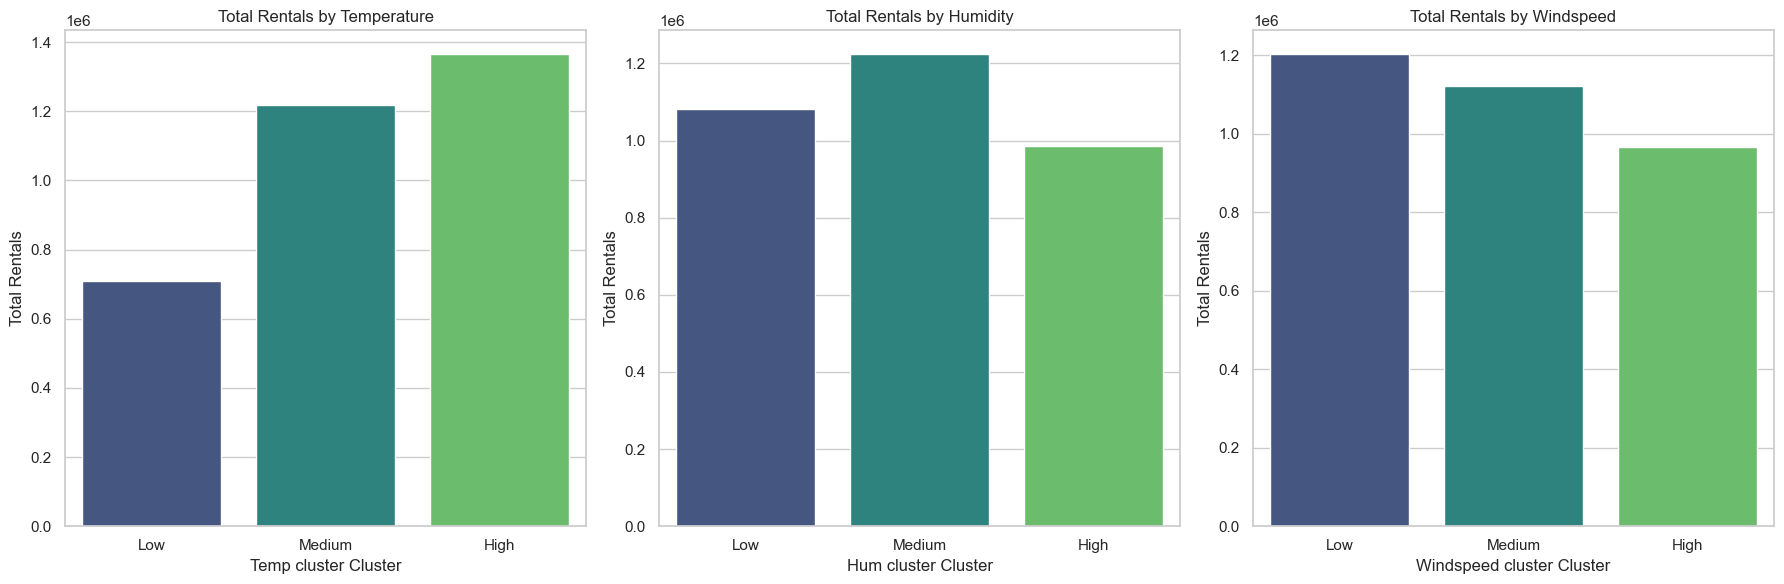

In [36]:
# Function to create a bar chart for clusters
def plot_cluster_total_rentals(df, cluster_var, ax, title):
    summary = df.groupby(cluster_var)['cnt'].agg('sum').reset_index()
    summary.columns = [cluster_var, 'Total Rentals']
    sns.barplot(data=summary, x=cluster_var, y='Total Rentals', palette="viridis", ax=ax)
    ax.set_title(f'Total Rentals by {title}')
    ax.set_xlabel(f'{cluster_var.replace("_", " ").capitalize()} Cluster')
    ax.set_ylabel('Total Rentals')

# Create a figure with 1 row and 3 columns for bar charts
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot bar charts for each cluster in a single row and 3 columns
plot_cluster_total_rentals(q_2, 'temp_cluster', ax[0], 'Temperature')
plot_cluster_total_rentals(q_2, 'hum_cluster', ax[1], 'Humidity')
plot_cluster_total_rentals(q_2, 'windspeed_cluster', ax[2], 'Windspeed')

# Adjust layout
plt.tight_layout()
plt.show()

> insight

**Temperature Cluster Summary:**

- Temperature Low: Suhu pada cluster ini lebih rendah dibandingkan cluster lainnya. Cuaca yang lebih dingin kemungkinan akan mengurangi minat sewa sepeda.
- Temperature Medium dan High: Suhu pada kedua cluster ini lebih tinggi, menunjukkan bahwa cuaca hangat lebih disukai untuk bersepeda.


**Humidity Cluster Summary:**

- Humidity Low: Memiliki tingkat persewaan yang lebih tinggi dibanding cluster lain. Tingkat kelembaban yang lebih rendah membuat bersepeda menjadi lebih nyaman.
- Humidity Medium: Juga tergolong tinggi, menunjukkan bahwa tingkat kelembaban sedang masih dapat diterima untuk bersepeda.
- Humidity High: Memiliki tingkat persewaan yang lebih rendah, kemungkinan karena ketidaknyamanan yang disebabkan oleh kelembaban tinggi.


**Windspeed Cluster Summary:**

- Windspeed Low: Memiliki tingkat persewaan tertinggi. Kondisi angin yang tenang ideal untuk bersepeda.
- Windspeed Medium dan High: Tingkat persewaan menurun seiring dengan meningkatnya kecepatan angin, menunjukkan bahwa angin kencang dapat mengurangi minat bersepeda.

## Conclusion

**Pola Persebaran Bersepeda Berdasarkan Suhu dan Musim**

Analisis data menunjukkan pola menarik dalam preferensi bersepeda berdasarkan suhu dan musim. Baik pengguna kasual maupun pengguna terdaftar menunjukkan kecenderungan serupa dalam memilih waktu bersepeda.

- **Musim Semi dan Musim Dingin:** Pada musim ini, baik pengguna kasual maupun pengguna terdaftar lebih memilih bersepeda saat suhu lebih tinggi. Hal ini dapat dimaklumi karena cuaca yang lebih dingin cenderung kurang nyaman untuk bersepeda.

- **Musim Panas:** Di musim panas, pola bersepeda menjadi lebih bervariasi. Pengguna kasual dan terdaftar terlihat bersepeda tanpa terlalu memperhatikan suhu. Hal ini diasumsikan karena suhu panas relatif konstan sepanjang musim panas.

- **Musim Gugur:** Pada musim gugur, terdapat konsistensi dalam preferensi bersepeda pada suhu yang lebih tinggi. Namun, distribusi data juga menunjukkan adanya pengguna yang memilih bersepeda pada suhu yang lebih rendah. Hal ini kemungkinan disebabkan oleh preferensi pribadi atau kondisi cuaca yang bervariasi dalam satu musim.

**Pola Persewaan Sepeda Berdasarkan Suhu, Humidity, dan Kecepatan Angin**

Analisis data menunjukkan pola menarik dalam preferensi penyewa sepeda berdasarkan suhu, kelembaban, dan kecepatan angin, dari Senin hingga Minggu.

- **Temperature:** Penyewa sepeda konsisten memilih untuk menyewa sepeda pada hari-hari dengan temperature tinggi. Hal ini terlihat jelas dari distribusi data yang menunjukkan kecenderungan untuk menyewa pada temperature yang lebih hangat.

- **Humidity:** Tingkat kelembaban yang disukai penyewa sepeda cenderung stabil di atas 0,5. Hal ini menunjukkan bahwa kelembaban sedang umumnya lebih nyaman untuk bersepeda dibandingkan dengan kondisi yang terlalu kering atau terlalu lembab.

- **Windspeed:** Penyewa sepeda lebih memilih untuk bersepeda pada hari-hari yang tidak terlalu berangin kencang. Hal ini terlihat dari distribusi data yang menunjukkan preferensi untuk menyewa pada hari-hari dengan Windspeed yang lebih rendah.

Secara keseluruhan, analisis ini menunjukkan bahwa penyewa sepeda lebih menyukai kondisi cuaca yang ideal untuk bersepeda, yaitu:

- **Temperature hangat:** Temperature yang lebih hangat umumnya lebih nyaman untuk bersepeda.
- **Humidity sedang:** Humidity sedang lebih ideal dibandingkan dengan kondisi yang terlalu kering atau terlalu lembab.
- **Windspeed tenang:** Windspeed yang tenang membuat bersepeda lebih aman dan menyenangkan.

**Hubungan Antara Faktor Cuaca dan Frekuensi Persewaan**

Analisis data juga menunjukkan hubungan yang menarik antara faktor cuaca dan frekuensi persewaan sepeda. Semakin tinggi nilai pada setiap kategori (kecuali humidity), semakin sering persewaan dilakukan. Hal ini dapat diinterpretasikan sebagai berikut:

- **Temperature:** Saat suhu semakin tinggi, semakin banyak orang yang tertarik untuk bersepeda.
- **Humidity:** Meskipun kelembaban ideal untuk bersepeda adalah sedang, frekuensi persewaan tidak menunjukkan korelasi yang jelas dengan tingkat kelembaban.
- **Windspeed:** Semakin tenang angin, semakin banyak orang yang memilih untuk bersepeda.